# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Adham Hesham Abdelhamid Nashaat Othman

ID:52-20555

Tutorial: T-09

---

Name: Ali Mohsen Elghoul

ID: 52-2708

Tutorial: T-09

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

<ipython-input-2-2d290214fd07>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  object 
 14  sellingprice  46578 non-null  object 
 15  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(14)
memory usage: 5.7+ MB


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
# Inspect nulls from color
unique_values_color = df['color'].unique()
unique_values_interior = df['interior'].unique()
print('unique values in column color')
print(unique_values_color)
print('unique values in column interior')
print(unique_values_interior)

unique values in column color
['black' 'gray' 'silver' 'white' 'blue' 'burgundy' 'beige' 'gold' 'green'
 'red' 'purple' '—' 'yellow' 'brown' 'turquoise' 'orange' 'off-white'
 'charcoal' 'pink' 'lime']
unique values in column interior
['gray' '—' 'black' 'beige' 'tan' 'red' 'blue' 'brown' 'off-white'
 'silver' 'orange' 'purple' 'white' 'gold' 'burgundy' 'green' 'yellow']


In [ ]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
#df=df.convert_dtypes()

In [ ]:
# Body adjusting
df['body']= df['body'].str.title()
df['body'] = df['body'].str.replace('.*coupe.*', 'Coupe', case=False, regex=True)
df['body']= df['body'].replace(['Suv'],'SUV')
df['body'] = df['body'].str.replace('.*sedan.*', 'Sedan', case=False, regex=True)
df['body'] = df['body'].str.replace('.*convertible.*', 'Convertible', case=False, regex=True)
df['body'] = df['body'].str.replace('.*hatchback.*', 'Hatchback', case=False, regex=True)
df['body'] = df['body'].str.replace('.*van.*', 'Minivan', case=False, regex=True)
df['body'] = df['body'].str.replace('.*wagon.*', 'Wagon', case=False, regex=True)
df['body'] = df['body'].str.replace('.*cab.*', 'Pickup Truck', case=False, regex=True)
df['body'] = df['body'].str.replace('.*supercrew.*', 'Pickup Truck', case=False, regex=True)
df['body'] = df['body'].str.replace('.*koup.*', 'Coupe', case=False, regex=True)
df['sellingprice']= df['sellingprice'].replace('[\$,]','',regex= True).astype(float)
df['mmr']= df['mmr'].replace('[\$,]','',regex= True).astype(float)
df['odometer']= df['odometer'].replace('mi','',regex= True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  float64
 14  sellingprice  46578 non-null  float64
 15  saledate      46578 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 5.7+ MB


In [ ]:
# Remove nulls from colors/ interior and replacing it with mode
color_mode = df[df['color'] !='—']['color'].mode()[0]
print(color_mode)
df['color'] = df['color'].replace('—',color_mode)
interior_mode = df[df['interior'] !='—']['interior'].mode()[0]
print(interior_mode)
df['interior'] = df['interior'].replace('—',interior_mode)

df

black
black


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,11000.0,10900.0,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,28700.0,29900.0,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,22200.0,24200.0,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3675.0,3200.0,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22500.0,22100.0,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0,black,gray,wheels exchange llc,15650.0,17000.0,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,Sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0,black,black,nissan infiniti lt,19350.0,21500.0,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0,white,beige,motorcars of south texas,22200.0,22000.0,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0,black,beige,avis rac/san leandro,13400.0,13800.0,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

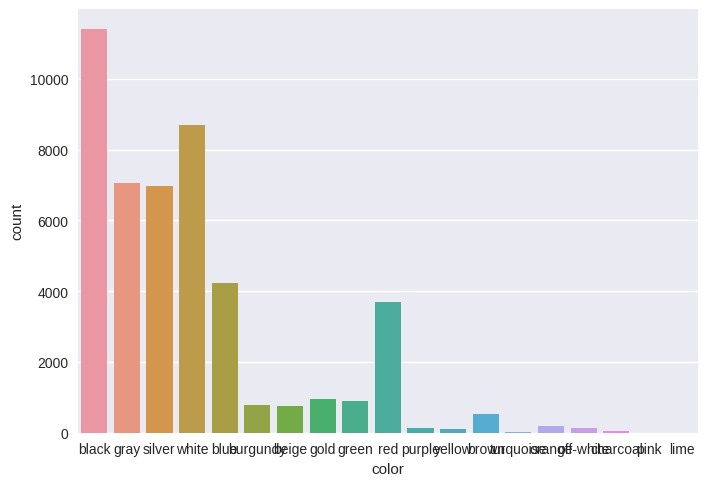

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

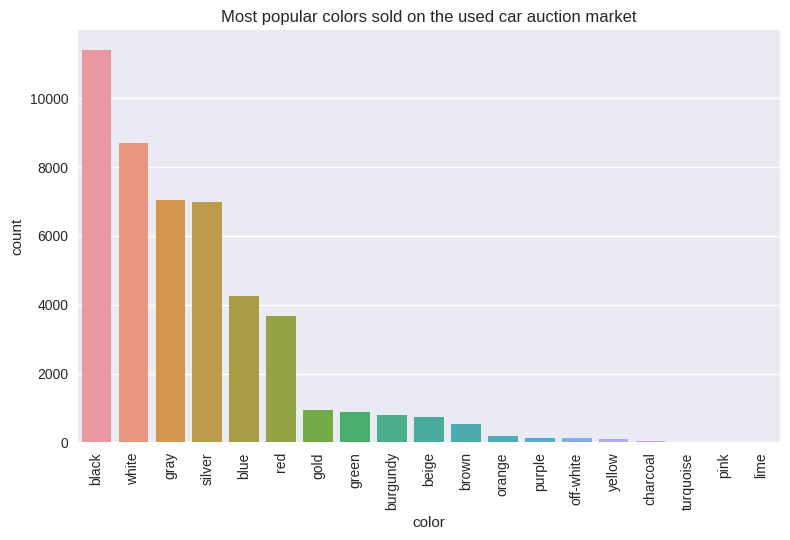

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

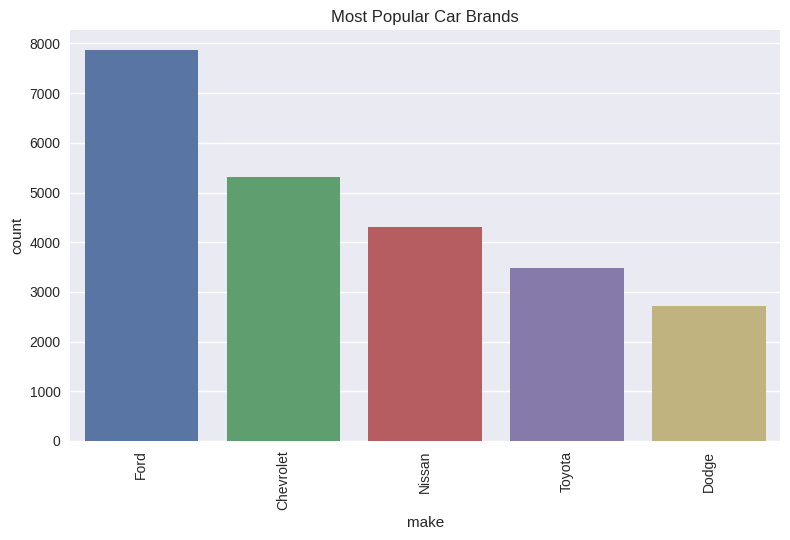

In [ ]:
large_to_small = df['make'].value_counts().index[:5]
sns.countplot(x='make', data=df, order=large_to_small)
plt.title('Most Popular Car Brands')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Answer for Q1**: Ford , Chevrolet, Nissan, Toyota, and Dodge

**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

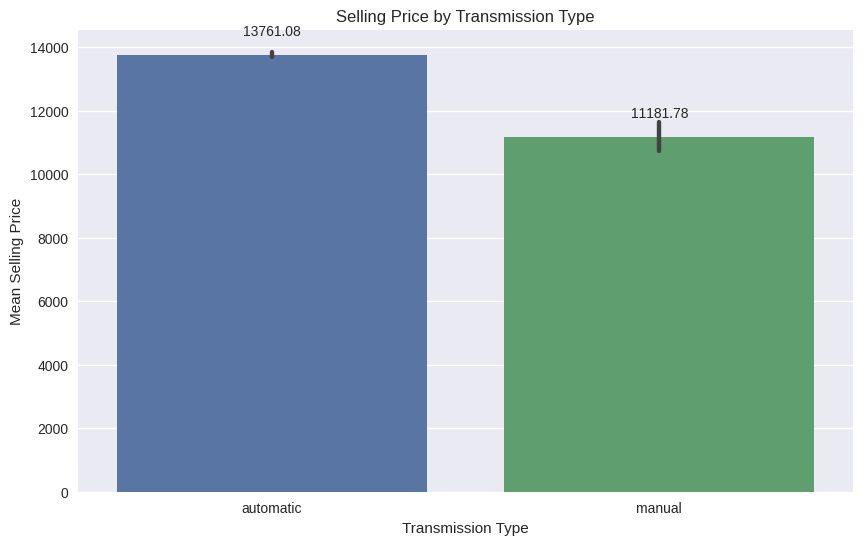

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='transmission', y='sellingprice', data=df)
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Mean Selling Price')

mean_prices = df.groupby('transmission')['sellingprice'].mean()
for i, mean_price in enumerate(mean_prices):
    plt.text(i, mean_price + 500, f'{mean_price:.2f}', ha='center', va='bottom')

plt.show()

**Answer for Q2**: Automatic cars are sold for a higher price

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

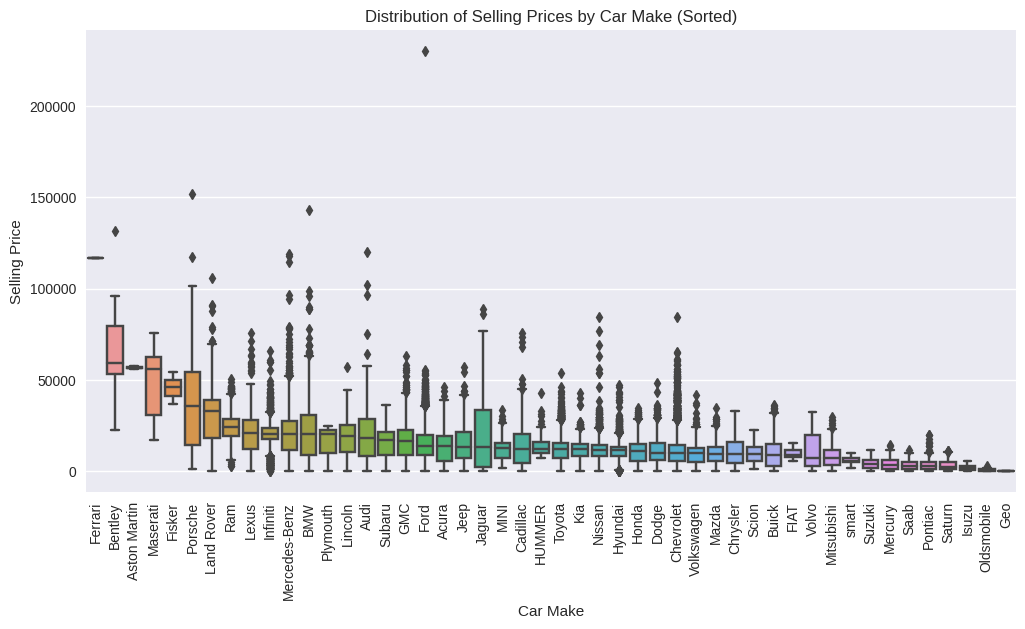

Car makes with the widest distribution of selling prices:
make
Bentley    33522.827377
Porsche    26717.778089
Jaguar     21099.904861
Name: sellingprice, dtype: float64

Most expensive car makes based on median selling price:
make
Ferrari         117000.0
Bentley          59250.0
Aston Martin     56750.0
Name: sellingprice, dtype: float64


In [ ]:
make_order = df.groupby('make')['sellingprice'].median().sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
sns.boxplot(x='make', y='sellingprice', data=df, order=make_order)
plt.title('Distribution of Selling Prices by Car Make (Sorted)')
plt.xlabel('Car Make')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()
widest_distribution_makes = df.groupby('make')['sellingprice'].std().nlargest(3)
print("Car makes with the widest distribution of selling prices:")
print(widest_distribution_makes)

most_expensive_makes = df.groupby('make')['sellingprice'].median().nlargest(3)
print("\nMost expensive car makes based on median selling price:")
print(most_expensive_makes)

**Answer for Q3**:  The widest distribution of selling price: Bentley, Porsche, and Jaguar.
Most expensive car makes based on median selling price: Ferrari, Bentley, and Aston Martin

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

In [ ]:
corr = df.corr()
corr

<ipython-input-11-4381f08f6434>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,year,condition,odometer,mmr,sellingprice
year,1.000000,0.549158,-0.777219,0.592904,0.581164
condition,0.549158,1.000000,-0.540371,0.476200,0.529141
odometer,-0.777219,-0.540371,1.000000,-0.587920,-0.580900
mmr,0.592904,0.476200,-0.587920,1.000000,0.979783
sellingprice,0.581164,0.529141,-0.580900,0.979783,1.000000


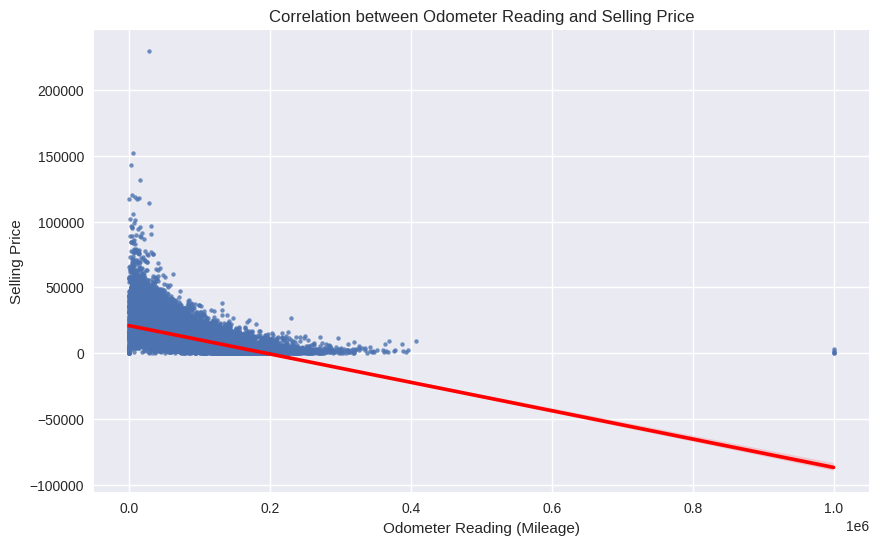

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='odometer', y='sellingprice', data=df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Correlation between Odometer Reading and Selling Price')
plt.xlabel('Odometer Reading (Mileage)')
plt.ylabel('Selling Price')
plt.show()

**Answer for Q4**: They are negativly Corrolated

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  mmr           46578 non-null  float64
 14  sellingprice  46578 non-null  float64
 15  saledate      46578 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 5.7+ MB


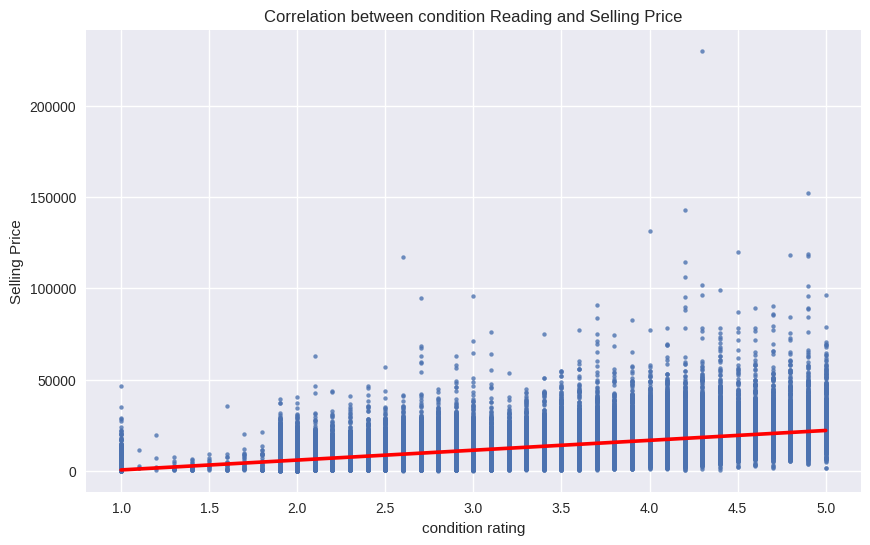

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='condition', y='sellingprice', data=df, scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('Correlation between condition Reading and Selling Price')
plt.xlabel('condition rating')
plt.ylabel('Selling Price')
plt.show()

**Answer for Q5**: They are positively Corrolated

**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**

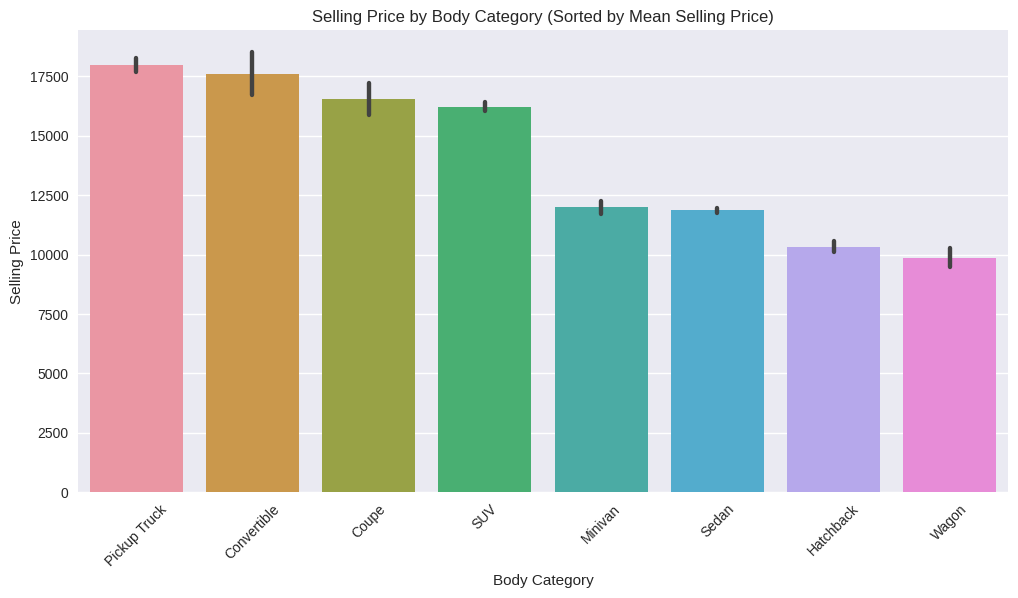

In [ ]:
sorted_body_order = df.groupby('body')['sellingprice'].mean().sort_values(ascending=False).index
plt.figure(figsize=(12, 6))
sns.barplot(x='body', y='sellingprice', data=df, order=sorted_body_order)
plt.title('Selling Price by Body Category (Sorted by Mean Selling Price)')
plt.xlabel('Body Category')
plt.ylabel('Selling Price')

plt.xticks(rotation=45)

plt.show()

**Answer for Q6**: Yes, the differences in the average car price due to the car’s body type and the most expensive car body type : Pickup Truck, Convertible, Coupe, SUV, Minivan, Sedan, Hatchback, and Wagon

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
#Encoding
from seaborn.widgets import color_palette
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
df_encoded = pd.get_dummies(df, columns=['transmission','make','body'],drop_first=True,dtype='int8')

df_encoded.columns

Index(['year', 'model', 'trim', 'vin', 'state', 'condition', 'odometer',
       'color', 'interior', 'seller', 'mmr', 'sellingprice', 'saledate',
       'transmission_manual', 'make_Aston Martin', 'make_Audi', 'make_BMW',
       'make_Bentley', 'make_Buick', 'make_Cadillac', 'make_Chevrolet',
       'make_Chrysler', 'make_Dodge', 'make_FIAT', 'make_Ferrari',
       'make_Fisker', 'make_Ford', 'make_GMC', 'make_Geo', 'make_HUMMER',
       'make_Honda', 'make_Hyundai', 'make_Infiniti', 'make_Isuzu',
       'make_Jaguar', 'make_Jeep', 'make_Kia', 'make_Land Rover', 'make_Lexus',
       'make_Lincoln', 'make_MINI', 'make_Maserati', 'make_Mazda',
       'make_Mercedes-Benz', 'make_Mercury', 'make_Mitsubishi', 'make_Nissan',
       'make_Oldsmobile', 'make_Plymouth', 'make_Pontiac', 'make_Porsche',
       'make_Ram', 'make_Saab', 'make_Saturn', 'make_Scion', 'make_Subaru',
       'make_Suzuki', 'make_Toyota', 'make_Volkswagen', 'make_Volvo',
       'make_smart', 'body_Coupe', 'body_Hatchback

In [ ]:
# normalization
numerical_columns = ['condition', 'odometer','year']

df_encoded[numerical_columns] = (df_encoded[numerical_columns] - df_encoded[numerical_columns].min()) / (df_encoded[numerical_columns].max() - df_encoded[numerical_columns].min())

df_encoded.head()

,year,model,trim,vin,state,condition,odometer,color,interior,seller,...,make_Volkswagen,make_Volvo,make_smart,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon
0,0.92,Sonata,GLS,5npeb4acxdh702805,ma,0.725,0.050403,black,gray,the hertz corporation,...,0,0,0,0,0,0,0,0,1,0
1,0.96,4Runner,SR5,jtezu5jr2e5064567,fl,0.975,0.017845,gray,black,award auto sales and leasing inc,...,0,0,0,0,0,0,0,1,0,0
2,0.88,IS 250,Base,jthbf5c24c5168599,fl,0.775,0.021121,silver,black,lexus financial services,...,0,0,0,0,0,0,0,0,1,0
3,0.48,X5,4.4i,5uxfb33562lh33864,fl,0.225,0.145302,black,black,peddle llc,...,0,0,0,0,0,0,0,1,0,0
4,0.96,E-Series Van,E-250,1ftne2ew0eda31832,wa,0.975,0.006713,white,gray,u-haul,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Drop
df_encoded.drop(columns=['vin','seller','mmr','saledate','color','interior','state','trim','model'], inplace=True)
df_encoded.head()

,year,condition,odometer,sellingprice,transmission_manual,make_Aston Martin,make_Audi,make_BMW,make_Bentley,make_Buick,...,make_Volkswagen,make_Volvo,make_smart,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon
0,0.92,0.725,0.050403,10900.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.96,0.975,0.017845,29900.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.88,0.775,0.021121,24200.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.48,0.225,0.145302,3200.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.96,0.975,0.006713,22100.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


We have dropped several columns from the dataset to streamline the feature selection process and improve the accuracy of the predictive model. The vin column, serving as an identifier, was removed as it does not contribute to predicting the selling price. Similarly, seller and mmr columns, which are not considered significant predictors, have been excluded. Additionally, attributes such as saledate, color, interior, state,trim, and model were eliminated from the dataset, as they were not deemed essential in influencing the selling price. This selective column removal aims to enhance the model's efficiency and the quality of predictions by focusing on the most relevant attributes.

## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from scipy import stats

#Removing outliers before modeling for better fitting and results
def remove_outliers_zscore(df, columns, z_threshold):
    z_scores = np.abs(stats.zscore(df_encoded[columns]))
    df_no_outliers = df[(z_scores < z_threshold).all(axis=1)]
    return df_no_outliers

z_threshold = 3

numerical_columns = ['condition', 'odometer','year']

df_encoded_no_outliers = remove_outliers_zscore(df_encoded, numerical_columns, z_threshold)

x = df_encoded_no_outliers.drop('sellingprice', axis=1)
y = df_encoded_no_outliers['sellingprice']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print('training dataset size:', x_train.shape[0])
print('training dataset size:', x_test.shape[0])

lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train);

training dataset size: 36645
training dataset size: 9162


## Model Evaluation

_Evaluate the model you applied._

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
y_pred = lin_reg.predict(x_test)
#eval
rmse = mean_squared_error(y_pred,y_test,squared=False)
# r_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)
#MAPE AND MAE
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)
print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

The root mean square error (RMSE) is:  5188.134615933785
R^2 obtained is: 0.6848193318457162
The mean absolute percentage error (MAPE) is:  0.5381896773614232
The median absolute error (MAE) is:  2685.3316946461655


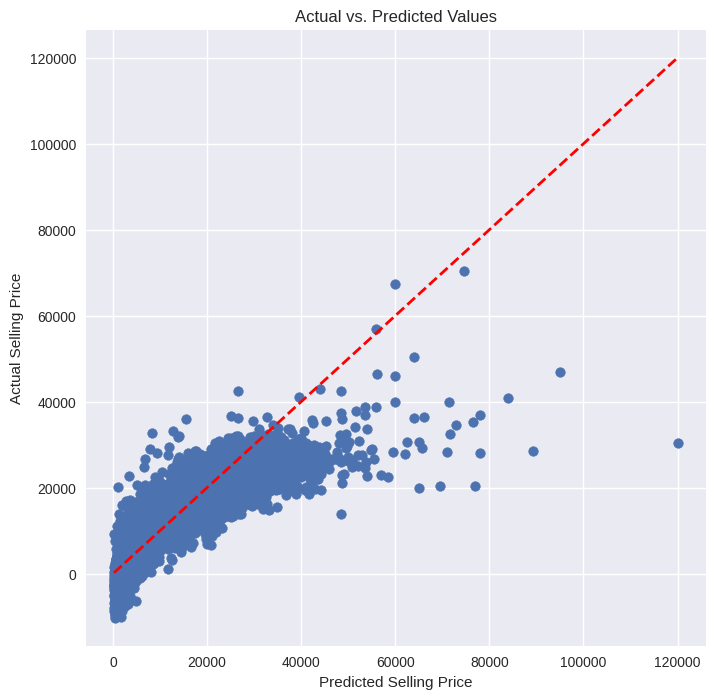

In [ ]:
#Scatter Plot for the model evaluation
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred)
plt.xlabel("Predicted Selling Price")
plt.ylabel("Actual Selling Price")
plt.title("Actual vs. Predicted Values")

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.show()

## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: The model evaluation results indicate that the model demonstrates reasonably good predictive power, as evidenced by an R-squared value of 0.685, signifying its capability to explain a significant portion of selling price variability. However, there is room for improvement, especially in reducing the Root Mean Square Error (RMSE) and Mean Absolute Percentage Error (MAPE), which suggest that the model's predictions may have substantial errors. These issues could be addressed by revisiting data preprocessing, and reevaluating feature engineering for the linear regression model. While the current model has potential, it may not yet meet the reliability standards sought by a used car dealership. Therefore, further refinement is recommended to make it a dependable tool for obtaining precise estimates of used car prices, which can significantly benefit decision-making and pricing competitiveness in the market. While the model is not a perfect fit, it doesn't exhibit signs of severe underfitting or overfitting. The model's performance suggests it may be close to the line of best fit but there is room for improvment, moreover signifying that it captures essential relationships within the data. Additional refinement could improve its fitting and predictive abilities.

